In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage.io
import cv2

In [2]:
curr_dir = os.getcwd()
path = os.path.dirname(curr_dir)
print(path)
csv_file_path = os.path.join(path, 'dataset/DataCSV/multicam_h3.csv')

/home/rasho/Falling-Person-Detection-based-On-AlphaPose


In [3]:
df = pd.read_csv(csv_file_path)
df = df.drop(['Unnamed: 0','idx'], axis=1)
#df = df.sort_values(['score'],ascending=False)

In [4]:
#df = df.drop_duplicates(subset = ['image_id','pos_class'], keep = 'first')
#df = df.sort_index()

In [7]:
df['pos_class'].value_counts()

NotFalls    85608
Falls        4407
Name: pos_class, dtype: int64

In [8]:
df.columns

Index(['image_id', 'pos_class', 'box', 'score', 'Hip_x', 'Hip_y', 'RHip_x',
       'RHip_y', 'RKnee_x', 'RKnee_y', 'RFoot_x', 'RFoot_y', 'LHip_x',
       'LHip_y', 'LKnee_x', 'LKnee_y', 'LFoot_x', 'LFoot_y', 'Spine_x',
       'Spine_y', 'Thorax_x', 'Thorax_y', 'Nose_x', 'Nose_y', 'Head_x',
       'Head_y', 'LShoulder_x', 'LShoulder_y', 'LElbow_x', 'LElbow_y',
       'LWrist_x', 'LWrist_y', 'RShoulder_x', 'RShoulder_y', 'RElbow_x',
       'RElbow_y', 'RWrist_x', 'RWrist_y'],
      dtype='object')

In [9]:
df.head()

,image_id,pos_class,box,score,Hip_x,Hip_y,RHip_x,RHip_y,RKnee_x,RKnee_y,...,LElbow_x,LElbow_y,LWrist_x,LWrist_y,RShoulder_x,RShoulder_y,RElbow_x,RElbow_y,RWrist_x,RWrist_y
0,img_00329.jpg,Falls,"[86.12754821777344, 30.314865112304688, 60.997...",2.500015,108.438797,109.511490,103.972824,110.255821,105.461479,138.540329,...,126.302696,80.482651,133.745987,93.880577,105.461479,67.084724,93.552208,93.880577,92.063553,116.210449
1,img_00330.jpg,Falls,"[87.28482818603516, 29.489715576171875, 61.257...",2.467526,108.038719,112.591988,103.481010,112.591988,106.519478,138.419022,...,127.788795,89.803436,135.384979,95.880379,106.519478,70.053352,95.884819,95.880379,91.327110,120.188171
2,img_00331.jpg,Falls,"[85.82068634033203, 38.18952941894531, 66.0814...",2.510501,110.793999,109.622894,104.926781,109.622894,109.327194,138.958984,...,140.130081,86.154022,143.063690,103.755676,112.260803,71.485977,99.059563,99.355263,91.725540,125.757736
3,img_00332.jpg,Falls,"[86.68836212158203, 40.91765213012695, 66.8146...",2.265060,114.393795,113.901840,109.404640,114.614578,109.404640,143.124023,...,146.466934,93.232491,143.615982,107.487213,113.681061,76.126816,99.426338,104.636269,95.149918,130.294769
4,img_00333.jpg,Falls,"[88.93512725830078, 45.54374313354492, 66.9209...",2.333632,115.550579,110.845238,109.390060,109.476234,112.128067,142.332321,...,150.460175,91.679184,155.936203,95.786194,117.604088,76.620140,105.283051,105.369217,98.438034,138.225311


In [10]:
#df = df.drop(['nose_x','nose_y','LEye_x',
#       'LEye_y', 'REye_x', 'REye_y', 'LEar_x', 'LEar_y', 'REar_x', 'REar_y'], axis=1)

In [ ]:
# Load a random image from the images folder
#file_names = next(os.walk(IMAGE_DIR))[2]

#image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
image = skimage.io.imread('/home/rasho/Falling-Person-Detection-based-On-AlphaPose/input/Falling_Standing/FallingDown_01/00400.png')
image.shape

In [ ]:
box = df['box'][400]
box

In [ ]:
x = float(box.strip('[,]').split(',')[0])
y = float(box.strip('[,]').split(',')[1])
w = float(box.strip('[,]').split(',')[2])
h = float(box.strip('[,]').split(',')[3])

In [ ]:
plt.imshow(image)

In [ ]:
bbox = [x,x+w,y,y+h] #xmin,xmax,ymin,ymax
cv2.rectangle(image, (int(bbox[0]), int(bbox[2])), (int(bbox[1]),int(bbox[3])), (0,255), 3)
plt.imshow(image)

In [11]:
import math
def get_angle(x,y):
    #return angle in degrees
    return (math.atan2(y,x)*(180/math.pi))

In [12]:
df['foot_x'] = df['RFoot_x']-df['LFoot_x']
df['foot_y'] = df['RFoot_y']-df['LFoot_y']
df['angle_x']= df['Head_x']-df['foot_x']
df['angle_y']= df['Head_y']-df['foot_y']

In [13]:
df[['angle_x','angle_y']]

,angle_x,angle_y
0,116.626419,37.311543
1,117.913754,43.466711
2,124.728634,39.216282
3,128.648521,41.915470
4,131.978626,49.924564
...,...,...
90010,347.160461,2.836747
90011,498.338638,70.699997
90012,569.672150,125.957806
90013,350.659256,3.471595


In [14]:
df['angle']= df.apply(lambda row: get_angle(x = row['angle_x'], y = row['angle_y']), axis=1)

In [15]:
df.head()

,image_id,pos_class,box,score,Hip_x,Hip_y,RHip_x,RHip_y,RKnee_x,RKnee_y,...,RShoulder_y,RElbow_x,RElbow_y,RWrist_x,RWrist_y,foot_x,foot_y,angle_x,angle_y,angle
0,img_00329.jpg,Falls,"[86.12754821777344, 30.314865112304688, 60.997...",2.500015,108.438797,109.511490,103.972824,110.255821,105.461479,138.540329,...,67.084724,93.552208,93.880577,92.063553,116.210449,2.977318,8.931961,116.626419,37.311543,17.740700
1,img_00330.jpg,Falls,"[87.28482818603516, 29.489715576171875, 61.257...",2.467526,108.038719,112.591988,103.481010,112.591988,106.519478,138.419022,...,70.053352,95.884819,95.880379,91.327110,120.188171,3.038475,9.115417,117.913754,43.466711,20.235470
2,img_00331.jpg,Falls,"[85.82068634033203, 38.18952941894531, 66.0814...",2.510501,110.793999,109.622894,104.926781,109.622894,109.327194,138.958984,...,71.485977,99.059563,99.355263,91.725540,125.757736,1.466805,14.668045,124.728634,39.216282,17.453816
3,img_00332.jpg,Falls,"[86.68836212158203, 40.91765213012695, 66.8146...",2.265060,114.393795,113.901840,109.404640,114.614578,109.404640,143.124023,...,76.126816,99.426338,104.636269,95.149918,130.294769,2.850945,14.254730,128.648521,41.915470,18.046327
4,img_00333.jpg,Falls,"[88.93512725830078, 45.54374313354492, 66.9209...",2.333632,115.550579,110.845238,109.390060,109.476234,112.128067,142.332321,...,76.620140,105.283051,105.369217,98.438034,138.225311,1.369003,10.952026,131.978626,49.924564,20.720510


In [19]:
df3 = df[['pos_class','angle']]
falling_angle  = df3.loc[(df3['pos_class']=='Falls')]
standing_angle = df3.loc[(df3['pos_class']=='NotFalls')]
falling_angle  = falling_angle.iloc[:160].to_numpy()
standing_angle = standing_angle.iloc[:160].to_numpy()

In [20]:
falling_angle

array([['Falls', 17.740700154524472],
       ['Falls', 20.235469936516026],
       ['Falls', 17.45381628276507],
       ['Falls', 18.046326929925943],
       ['Falls', 20.720510096864555],
       ['Falls', 23.089308251344846],
       ['Falls', 25.40786586646932],
       ['Falls', 28.193254358277937],
       ['Falls', 30.88064863388541],
       ['Falls', 21.40317584574117],
       ['Falls', 47.895131045844906],
       ['Falls', 31.956004085508518],
       ['Falls', 5.771863600566374],
       ['Falls', 6.1578796957674165],
       ['Falls', 8.99194199901173],
       ['Falls', 15.93500743741792],
       ['Falls', 15.67518280203423],
       ['Falls', 16.217462956629035],
       ['Falls', 16.734381991466105],
       ['Falls', 17.148479970950252],
       ['Falls', 17.299390215748602],
       ['Falls', 17.916179241270424],
       ['Falls', 18.765410999180247],
       ['Falls', 19.18837883869243],
       ['Falls', 19.70422808356418],
       ['Falls', 20.94717698031061],
       ['Falls', 22.5561

In [21]:
falling_angle[:,1].min()

5.536973264953672

In [22]:
falling_angle[:,1].max()

47.895131045844906

In [23]:
falling_angle[:,1].mean()

26.851910930311014

In [24]:
standing_angle

array([['NotFalls', 39.16649461013154],
       ['NotFalls', 41.038594565751794],
       ['NotFalls', 44.26123816605235],
       ['NotFalls', 18.317772757658084],
       ['NotFalls', 47.24349646277791],
       ['NotFalls', 45.98884551174094],
       ['NotFalls', 45.320198211415715],
       ['NotFalls', 45.186014676817656],
       ['NotFalls', 20.181823388306285],
       ['NotFalls', 42.63229865332171],
       ['NotFalls', 39.12429945070267],
       ['NotFalls', 39.90747489732],
       ['NotFalls', 34.2498607673011],
       ['NotFalls', 39.671173156828424],
       ['NotFalls', 42.61234557712917],
       ['NotFalls', 34.01187177826781],
       ['NotFalls', 30.343471076462347],
       ['NotFalls', 28.232216286144787],
       ['NotFalls', 27.398280322999543],
       ['NotFalls', 18.667856485063272],
       ['NotFalls', 27.713959982301695],
       ['NotFalls', 27.31693737404859],
       ['NotFalls', 27.846504302612757],
       ['NotFalls', 27.487024757099284],
       ['NotFalls', 28.72415278

In [25]:
standing_angle[:,1].min()

6.009811981570872

In [26]:
standing_angle[:,1].max()

72.55329898452842

In [27]:
standing_angle[:,1].mean()

30.773633474871836

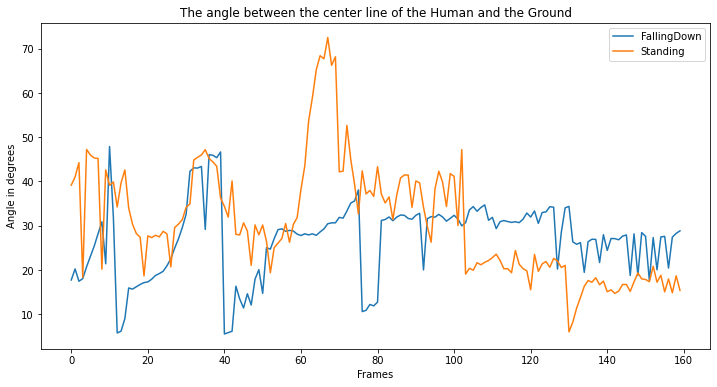

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
frames = np.arange(0,len(falling_angle))
plt.plot(frames,falling_angle[:,1],label='FallingDown')
plt.plot(frames,standing_angle[:,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Angle in degrees')
plt.title('The angle between the center line of the Human and the Ground')
plt.legend()
plt.show()

In [29]:
df4 = df[['pos_class','score']]
falling_dist = df4.loc[(df4['pos_class']=='Falls')]
standing_dist = df4.loc[(df4['pos_class']=='NotFalls')]
falling_dist  = falling_dist.iloc[:160].to_numpy()
standing_dist = standing_dist.iloc[:160].to_numpy()

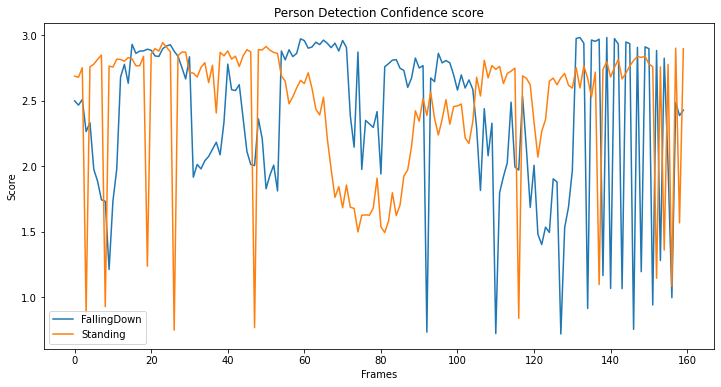

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
frames = np.arange(0,len(falling_dist))
plt.plot(frames,falling_dist[:,1],label='FallingDown')
plt.plot(frames,standing_dist[:,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Score')
plt.title('Person Detection Confidence score')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
num_bins = 50
plt.hist(df4['score'],num_bins,density=True)
#plt.hist(stand[:,0],num_bins,density=True)
plt.show()

In [ ]:
df['score'].mean()

In [ ]:
df['score'].max()

In [ ]:
df['score'].min()

In [ ]:
plt.hist??

In [32]:
df['Knee_x'] = df['RKnee_x']- df['LKnee_x']
df['Knee_y'] = df['RKnee_y']- df['LKnee_y']
df['SK_x']= df['Spine_x']-df['Knee_x']
df['SK_y']= df['Spine_y']-df['Knee_y']
df['dist'] = np.sqrt(np.square(df['SK_x'])+np.square(df['SK_y']))

In [33]:
df4 = df[['pos_class','dist']]
falling_dist = df4.loc[(df4['pos_class']=='Falls')]
standing_dist = df4.loc[(df4['pos_class']=='NotFalls')]
falling_dist  = falling_dist.iloc[:160].to_numpy()
standing_dist = standing_dist.iloc[:160].to_numpy()

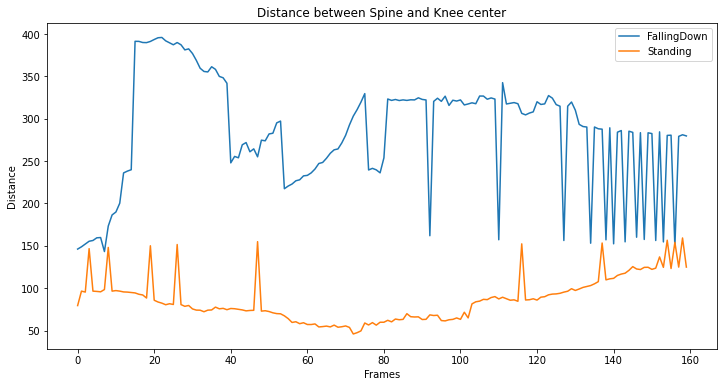

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
frames = np.arange(0,len(falling_dist))
plt.plot(frames,falling_dist[:,1],label='FallingDown')
plt.plot(frames,standing_dist[:,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Distance')
plt.title('Distance between Spine and Knee center')
plt.legend()
plt.show()

In [ ]:
df4['dist'].mean()

In [ ]:
df4['dist'].min()

In [ ]:
df4['dist'].max()

In [66]:
#df4.loc[(df4['pos_class']=='NotFalls')&(df4['dist']<300)]
df4.loc[(df4['pos_class']=='Standing')&(df4['dist']<300)]

,pos_class,dist
17286,Standing,146.004979
17287,Standing,145.483508
17288,Standing,145.915671
17289,Standing,145.126100
17290,Standing,146.027987
...,...,...
54863,Standing,203.070017
54874,Standing,207.060440
54900,Standing,202.859455
54927,Standing,197.452868


In [35]:
def get_ratio(box):
    
    x = float(box.strip('[,]').split(',')[0])
    y = float(box.strip('[,]').split(',')[1])
    w = float(box.strip('[,]').split(',')[2])
    h = float(box.strip('[,]').split(',')[3])
    return w/h

In [36]:
df['box_ratio']=df['box'].map(get_ratio)

In [37]:
df['box_ratio'][5273]

0.4511016355232178

In [38]:
df5 = df[['pos_class','box_ratio']]
falling_ratio  = df5.loc[(df5['pos_class']=='Falls')]
standing_ratio = df5.loc[(df5['pos_class']=='NotFalls')]
falling_ratio  = falling_ratio.iloc[:3300].to_numpy()
standing_ratio = standing_ratio.iloc[:3300].to_numpy()

In [39]:
falling_ratio[:,1].mean()

0.597407779856028

In [40]:
falling_ratio[:,1].max()

2.4419256910775053

In [41]:
falling_ratio[:,1].min()

0.20164297354113878

In [42]:
standing_ratio[:,1].mean()

0.3694917744881505

In [43]:
standing_ratio[:,1].max()

0.9880907305906496

In [44]:
standing_ratio[:,1].min()

0.18430894424177507

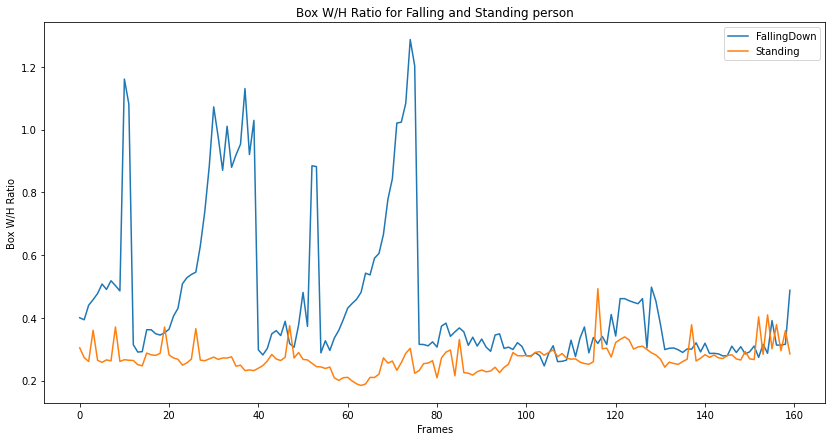

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
frames = np.arange(0,len(falling_ratio ))
plt.plot(frames[:160],falling_ratio[:160,1],label='FallingDown')
plt.plot(frames[:160],standing_ratio[:160,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Box W/H Ratio')
plt.title('Box W/H Ratio for Falling and Standing person')
plt.legend()
plt.show()

In [46]:
df2 = df[['image_id','pos_class','box_ratio']]

In [ ]:
df2.loc[(df2['pos_class']=='FallingDown')&(df2['box_ratio']>2)]

In [ ]:
df2.loc[(df2['pos_class']=='FallingDown')&(df2['box_ratio']<2)]

In [ ]:
df2.loc[(df2['pos_class']=='Standing')&(df2['box_ratio']>2)]

In [ ]:
df2.loc[(df2['pos_class']=='FallingDown')& (df2['box_ratio']>0.95) | (df2['pos_class']=='Standing')& (df2['box_ratio']<0.95)]

In [ ]:
df2['pos_class'].unique

In [ ]:
x1_diff,y1_diff = feat_df['LShoulder_x']-feat_df['nose_x'],feat_df['LShoulder_y']-feat_df['nose_y']
x1y1_len = np.sqrt(np.square(x1_diff)+np.square(y1_diff))
x1,y1 = x1_diff/x1y1_len,y1_diff/x1y1_len
df['x1'] = x1
df['y1'] = y1

In [ ]:
x2_diff, y2_diff = feat_df['RShoulder_x']-feat_df['nose_x'],feat_df['RShoulder_y']-feat_df['nose_y']
x2y2_len = np.sqrt(np.square(x2_diff)+np.square(y2_diff))
x2, y2 = x2_diff/x2y2_len, y2_diff/x2y2_len
df['x2'] = x2
df['y2'] = y2

In [ ]:
df.columns

In [ ]:
df

In [ ]:
df[df.iloc[:,30:].isna().any(axis=1)]

In [ ]:
df = df.dropna()

In [ ]:
df.isna().any()

In [ ]:
df.to_csv('data/victorized_res.csv')

In [ ]:
curr_dir = os.getcwd()
csv_file_path = os.path.join(curr_dir, 'data/res_with_flips.csv')

In [ ]:
df2 = pd.read_csv(csv_file_path)
df2 = df2.drop(['Unnamed: 0','idx'], axis=1)
df2 = df2.sort_values(['score'],ascending=False)

In [ ]:
df2 = df2.drop_duplicates(subset = ['image_id','pos_class'], keep = 'first')
df2 = df2.sort_index()
df2.head()

In [ ]:
df2

In [ ]:
df2.to_csv('data/clean_res_with_flips.csv')

In [ ]:
df.columns

In [47]:
def get_center(coord1, coord2):
    return (coord1+coord2)/2

In [48]:
# get center of Right Hip joint and Left Hip joint
df['HipCent_x'] = df.apply(lambda row: get_center(coord1=row['RHip_x'],coord2=row['LHip_x']), axis=1)
df['HipCent_y'] = df.apply(lambda row: get_center(coord1=row['RHip_y'],coord2=row['LHip_y']), axis=1)

In [49]:
df.head()

,image_id,pos_class,box,score,Hip_x,Hip_y,RHip_x,RHip_y,RKnee_x,RKnee_y,...,angle_y,angle,Knee_x,Knee_y,SK_x,SK_y,dist,box_ratio,HipCent_x,HipCent_y
0,img_00329.jpg,Falls,"[86.12754821777344, 30.314865112304688, 60.997...",2.500015,108.438797,109.511490,103.972824,110.255821,105.461479,138.540329,...,37.311543,17.740700,-5.954636,0.000000,116.998585,87.553778,146.131218,0.400146,108.438797,109.511490
1,img_00330.jpg,Falls,"[87.28482818603516, 29.489715576171875, 61.257...",2.467526,108.038719,112.591988,103.481010,112.591988,106.519478,138.419022,...,43.466711,20.235470,-7.596184,1.519241,118.673376,89.803429,148.822129,0.393764,108.038719,112.591988
2,img_00331.jpg,Falls,"[85.82068634033203, 38.18952941894531, 66.0814...",2.510501,110.793999,109.622894,104.926781,109.622894,109.327194,138.958984,...,39.216282,17.453816,-7.334023,1.466812,123.628536,88.720922,152.169041,0.439954,110.793999,109.622894
3,img_00332.jpg,Falls,"[86.68836212158203, 40.91765213012695, 66.8146...",2.265060,114.393795,113.901840,109.404640,114.614578,109.404640,143.124023,...,41.915470,18.046327,-5.701897,2.850937,125.084848,92.163391,155.371522,0.457734,114.393795,113.901840
4,img_00333.jpg,Falls,"[88.93512725830078, 45.54374313354492, 66.9209...",2.333632,115.550579,110.845238,109.390060,109.476234,112.128067,142.332321,...,49.924564,20.720510,-4.107018,1.369003,125.818115,92.705936,156.283680,0.477373,115.550579,110.845238


In [50]:
def get_vector(p1_x,p1_y,p2_x,p2_y):
    
    return p2_x-p1_x, p2_y-p1_y

In [51]:
#get waist, Spine2, Right thigh, Left Thigh, Right Calf, Left Calf vectors.
df['waist_x'], df['waist_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['RHip_x'],p1_y=row['RHip_y'],p2_x=row['LHip_x'],p2_y=row['LHip_y']), axis=1))
df['Spine2_x'], df['Spine2_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['Thorax_x'],p1_y=row['Thorax_y'],p2_x=row['HipCent_x'],p2_y=row['HipCent_y']), axis=1))
df['Rthigh_x'], df['Rthigh_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['RHip_x'],p1_y=row['RHip_y'],p2_x=row['RKnee_x'],p2_y=row['RKnee_y']), axis=1))
df['Lthigh_x'], df['Lthigh_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['LHip_x'],p1_y=row['LHip_y'],p2_x=row['LKnee_x'],p2_y=row['LKnee_y']), axis=1))
df['Rcalf_x'], df['Rcalf_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['RKnee_x'],p1_y=row['RKnee_y'],p2_x=row['RFoot_x'],p2_y=row['RFoot_y']), axis=1))
df['Lcalf_x'], df['Lcalf_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['LKnee_x'],p1_y=row['LKnee_y'],p2_x=row['LFoot_x'],p2_y=row['LFoot_y']), axis=1))


In [52]:
def get_vectorRatio(p1_x,p1_y,p2_x,p2_y):
    # add small number to numerator and denominator
    p1_len = np.sqrt(np.square(p1_x)+np.square(p1_y))
    p2_len = np.sqrt(np.square(p2_x)+np.square(p2_y))
    return (p1_len+0.00001)/(p2_len+0.00001)

In [53]:
df['SRatio'] = df.apply(lambda row: get_vectorRatio(p1_x=row['Spine2_x'],p1_y=row['Spine2_y'],p2_x=row['waist_x'],p2_y=row['waist_y']), axis=1)

In [57]:
df2 = df[['pos_class','SRatio']]

In [62]:
fall = df2.loc[(df2['pos_class']=='Falls')]
fall = fall.iloc[:4000].iloc[:,1].to_numpy()

In [63]:
fall

array([4.88378247, 4.71404336, 3.44260767, ..., 4.23147349, 4.28018192,
       3.63681602])

In [66]:
stand = df2.loc[(df2['pos_class']=='NotFalls')]
stand = stand[:4000].iloc[:,1].to_numpy()

In [67]:
stand

array([ 3.13476103,  5.41666052,  6.0795978 , ..., 13.0384068 ,
        3.15784569,  2.63049536])

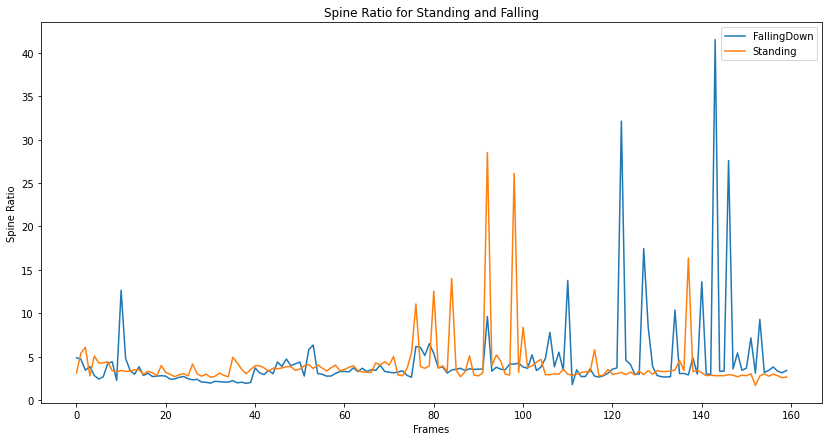

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
frames = np.arange(0,len(fall))
plt.plot(frames[:160],fall[:160],label='FallingDown')
plt.plot(frames[:160], stand[:160],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Spine Ratio')
plt.title('Spine Ratio for Standing and Falling')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
num_bins = 5
plt.hist(fall[:,0],num_bins,density=True)
plt.hist(stand[:,0],num_bins,density=True)
plt.show()

In [106]:
df.head()

,image_id,pos_class,box,score,Hip_x,Hip_y,RHip_x,RHip_y,RKnee_x,RKnee_y,...,Spine2_y,Rthigh_x,Rthigh_y,Lthigh_x,Lthigh_y,Rcalf_x,Rcalf_y,Lcalf_x,Lcalf_y,SRatio
0,01095.jpg,Falling,"[264.7388000488281, 97.85186004638672, 174.059...",2.473748,372.166229,201.207169,380.098633,201.207169,409.561859,242.002396,...,69.125267,29.463226,40.795227,31.729614,33.996017,4.532806,52.127243,-38.528809,22.664032,4.585358
1,01096.jpg,Falling,"[270.8756103515625, 90.72824096679688, 167.931...",2.418112,365.774277,202.608543,373.427399,201.515244,404.039856,240.874130,...,65.598167,30.612457,39.358887,32.799072,32.799088,8.746429,52.478531,19.679474,50.291916,4.712215
2,01097.jpg,Falling,"[205.35069274902344, 93.36463165283203, 236.03...",2.625777,361.788422,201.726387,361.788422,203.263107,398.669617,243.217728,...,64.542091,36.881195,39.954620,36.881195,39.954636,12.293732,49.174942,12.293732,49.174911,23.706408
3,01098.jpg,Falling,"[207.93246459960938, 113.12434387207031, 227.2...",2.519368,354.134201,201.688332,355.613983,203.168106,394.088104,241.642258,...,57.711205,38.474121,38.474152,38.474152,38.474152,14.797760,50.312332,14.797729,41.433685,15.186270
4,01099.jpg,Falling,"[206.1958465576172, 104.33092498779297, 230.08...",2.612864,349.700714,212.788422,355.692566,211.290466,385.651825,241.249725,...,62.914444,29.959259,29.959259,35.951111,23.967407,20.971466,47.934814,-50.930756,23.967407,6.330364


In [107]:
df.columns

Index(['image_id', 'pos_class', 'box', 'score', 'Hip_x', 'Hip_y', 'RHip_x',
       'RHip_y', 'RKnee_x', 'RKnee_y', 'RFoot_x', 'RFoot_y', 'LHip_x',
       'LHip_y', 'LKnee_x', 'LKnee_y', 'LFoot_x', 'LFoot_y', 'Spine_x',
       'Spine_y', 'Thorax_x', 'Thorax_y', 'Nose_x', 'Nose_y', 'Head_x',
       'Head_y', 'LShoulder_x', 'LShoulder_y', 'LElbow_x', 'LElbow_y',
       'LWrist_x', 'LWrist_y', 'RShoulder_x', 'RShoulder_y', 'RElbow_x',
       'RElbow_y', 'RWrist_x', 'RWrist_y', 'foot_x', 'foot_y', 'angle_x',
       'angle_y', 'angle', 'Knee_x', 'Knee_y', 'SK_x', 'SK_y', 'dist',
       'box_ratio', 'HipCent_x', 'HipCent_y', 'waist_x', 'waist_y', 'Spine2_x',
       'Spine2_y', 'Rthigh_x', 'Rthigh_y', 'Lthigh_x', 'Lthigh_y', 'Rcalf_x',
       'Rcalf_y', 'Lcalf_x', 'Lcalf_y', 'SRatio'],
      dtype='object')

In [71]:
df['hip_v'] = df['HipCent_y'].diff(periods=5).abs()/4

In [72]:
df['spine_v'] = df['Spine_y'].diff(periods=5).abs()/4

In [73]:
df['head_v'] = df['Head_y'].diff(periods=5).abs()/4

In [74]:
df.isna().any()

image_id     False
pos_class    False
box          False
score        False
Hip_x        False
             ...  
Lcalf_y      False
SRatio       False
hip_v         True
spine_v       True
head_v        True
Length: 67, dtype: bool

In [75]:
df[df.iloc[:,30:].isna().any(axis=1)]

,image_id,pos_class,box,score,Hip_x,Hip_y,RHip_x,RHip_y,RKnee_x,RKnee_y,...,Lthigh_x,Lthigh_y,Rcalf_x,Rcalf_y,Lcalf_x,Lcalf_y,SRatio,hip_v,spine_v,head_v
0,img_00329.jpg,Falls,"[86.12754821777344, 30.314865112304688, 60.997...",2.500015,108.438797,109.511490,103.972824,110.255821,105.461479,138.540329,...,-1.488655,29.773170,-2.977318,28.284515,-11.909271,19.352554,4.883782,NaN,NaN,NaN
1,img_00330.jpg,Falls,"[87.28482818603516, 29.489715576171875, 61.257...",2.467526,108.038719,112.591988,103.481010,112.591988,106.519478,138.419022,...,1.519234,24.307793,-3.038467,27.346252,-13.673126,19.750076,4.714043,NaN,NaN,NaN
2,img_00331.jpg,Falls,"[85.82068634033203, 38.18952941894531, 66.0814...",2.510501,110.793999,109.622894,104.926781,109.622894,109.327194,138.958984,...,0.000000,27.869278,-5.867218,30.802887,-14.668045,17.601654,3.442608,NaN,NaN,NaN
3,img_00332.jpg,Falls,"[86.68836212158203, 40.91765213012695, 66.8146...",2.265060,114.393795,113.901840,109.404640,114.614578,109.404640,143.124023,...,-4.276413,27.083984,-4.276413,28.509460,-12.829254,17.105667,3.876206,NaN,NaN,NaN
4,img_00333.jpg,Falls,"[88.93512725830078, 45.54374313354492, 66.9209...",2.333632,115.550579,110.845238,109.390060,109.476234,112.128067,142.332321,...,-5.476013,28.749077,-8.214020,28.749084,-13.690041,19.166061,2.831024,NaN,NaN,NaN


In [76]:
df = df.dropna()

In [77]:
df.isna().any()

image_id     False
pos_class    False
box          False
score        False
Hip_x        False
             ...  
Lcalf_y      False
SRatio       False
hip_v        False
spine_v      False
head_v       False
Length: 67, dtype: bool

In [79]:
df5 = df[['pos_class','hip_v','spine_v','head_v']]
fall = df5.loc[(df5['pos_class']=='Falls')]
stand = df5.loc[(df5['pos_class']=='NotFalls')]
fall  = fall.iloc[:3300].to_numpy()
stand  = stand.iloc[:3300].to_numpy()

In [80]:
fall[:,1].min()

8.0108642578125e-05

In [81]:
fall[:,1].mean()

9.921141362912728

In [82]:
fall[:,1].max()

94.00399398803711

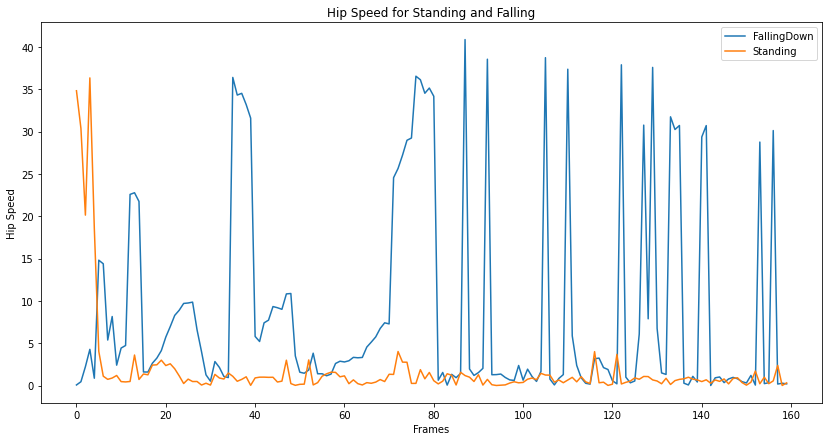

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
frames = np.arange(0,len(fall))
plt.plot(frames[:160],fall[:160,1],label='FallingDown')
plt.plot(frames[:160], stand[:160,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Hip Speed')
plt.title('Hip Speed for Standing and Falling')
plt.legend()
plt.show()

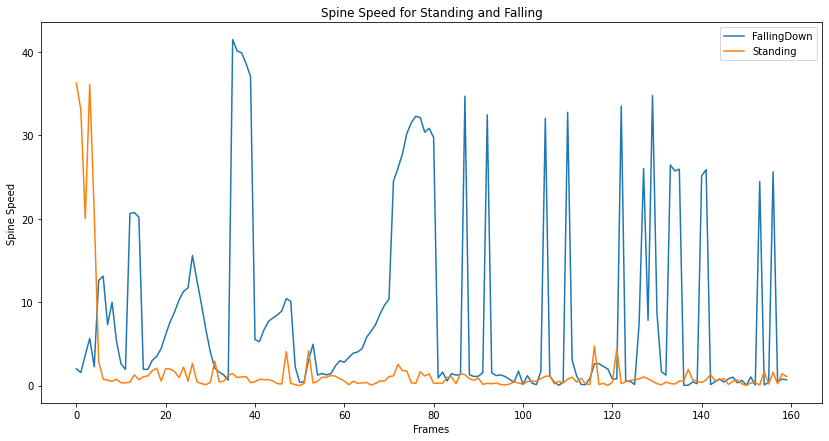

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
frames = np.arange(0,len(fall))
plt.plot(frames[:160],fall[:160,2],label='FallingDown')
plt.plot(frames[:160], stand[:160,2],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Spine Speed')
plt.title('Spine Speed for Standing and Falling')
plt.legend()
plt.show()

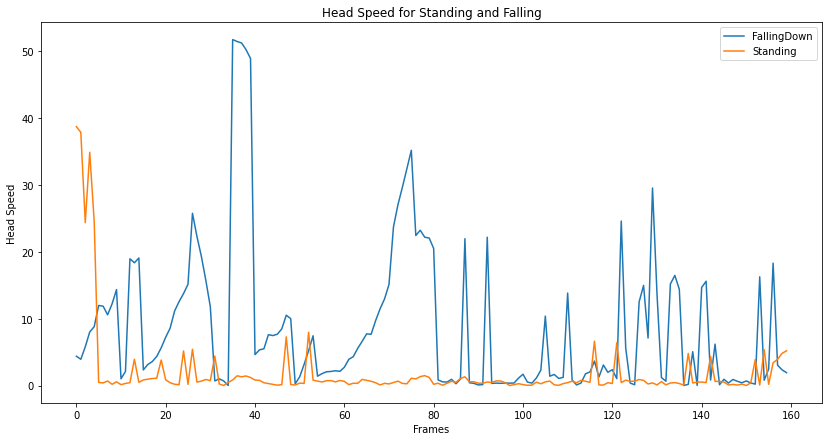

In [85]:
plt.figure(figsize=(14,7))
frames = np.arange(0,len(fall))
plt.plot(frames[:160],fall[:160,3],label='FallingDown')
plt.plot(frames[:160], stand[:160,3],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Head Speed')
plt.title('Head Speed for Standing and Falling')
plt.legend()
plt.show()